In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

c:\Users\admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor

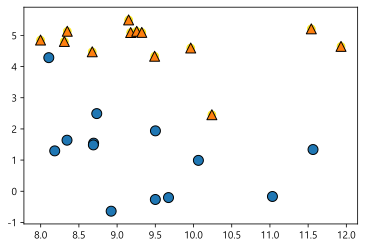

In [4]:
X, y = mglearn.datasets.make_forge()
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

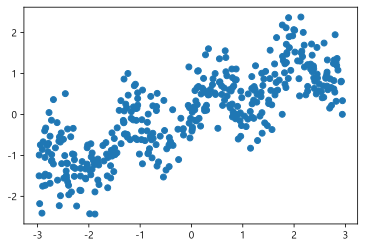

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=400)
plt.scatter(X, y)

In [6]:
cancer = load_breast_cancer(as_frame=True)
cancer['data'].shape
cancer['target'].replace(dict(enumerate(cancer['target_names']))).value_counts()

benign       357
malignant    212
Name: target, dtype: int64

In [7]:
{n: v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))}, np.bincount(cancer['target'])

({'malignant': 212, 'benign': 357}, array([212, 357], dtype=int64))

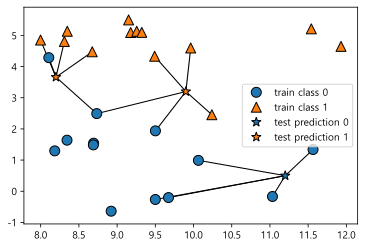

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [10]:
# metric 파라미터로 거리측정 방식 변경 가능 → default는 'minkowski'
knn_clf = KNeighborsClassifier(n_neighbors=3, metric='minkowski').fit(X_train, y_train)
knn_clf.predict(X_test), knn_clf.score(X_test, y_test)

(array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0]),
 0.9230769230769231)

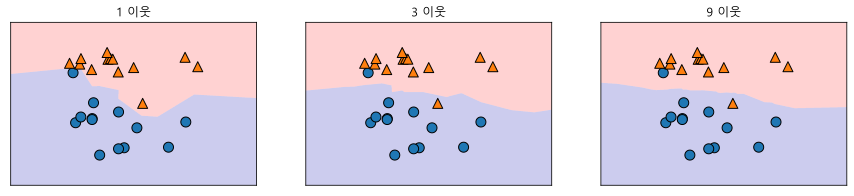

In [11]:
X, y = mglearn.datasets.make_forge()
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
for n_neighbors, ax in zip([1, 3, 9], axs):
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.tools.plot_2d_separator(knn_clf, X, fill=True, ax=ax, alpha=0.2)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_neighbors} 이웃')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

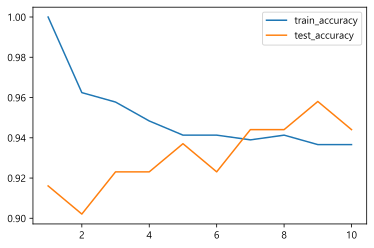

In [13]:
train_accuracy = []
test_accuracy = []
neighbors_setting = range(1, 11)
for n_neighbors in neighbors_setting:
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    train_accuracy.append(knn_clf.score(X_train, y_train))
    test_accuracy.append(knn_clf.score(X_test, y_test))
plt.plot(neighbors_setting, train_accuracy, label='train_accuracy')
plt.plot(neighbors_setting, test_accuracy, label='test_accuracy')
plt.legend()

In [14]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state=0)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [15]:
# weights 파라미터가 'distance'일 때 거리를 고려한 가중평균을 계산
knn_reg = KNeighborsRegressor(n_neighbors=3, weights='distance').fit(X_train, y_train)
knn_reg.score(X_test, y_test)

0.5158073940789912

In [16]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [17]:
lr_reg = LinearRegression().fit(X_train, y_train)
# sklearn의 경우 훈련 데이터에서 유도된 속성은 항상 끝에 밑줄
lr_reg.coef_.round(3), lr_reg.intercept_, lr_reg.score(X_train, y_train), lr_reg.score(X_test, y_test)

(array([-4.127110e+02, -5.224300e+01, -1.318990e+02, -1.200400e+01,
        -1.551100e+01,  2.871600e+01,  5.470400e+01, -4.953500e+01,
         2.658200e+01,  3.706200e+01, -1.182800e+01, -1.805800e+01,
        -1.952500e+01,  1.220300e+01,  2.980781e+03,  1.500843e+03,
         1.141870e+02, -1.697000e+01,  4.096100e+01, -2.426400e+01,
         5.761600e+01,  1.278121e+03, -2.239869e+03,  2.228250e+02,
        -2.182000e+00,  4.299600e+01, -1.339800e+01, -1.938900e+01,
        -2.575000e+00, -8.101300e+01,  9.660000e+00,  4.914000e+00,
        -8.120000e-01, -7.647000e+00,  3.378400e+01, -1.144600e+01,
         6.850800e+01, -1.737500e+01,  4.281300e+01,  1.140000e+00,
        -7.730000e-01,  5.682600e+01,  1.428800e+01,  5.395500e+01,
        -3.217100e+01,  1.927100e+01, -1.388500e+01,  6.063400e+01,
        -1.231500e+01, -1.200400e+01, -1.772400e+01, -3.398700e+01,
         7.090000e+00, -9.225000e+00,  1.719800e+01, -1.277200e+01,
        -1.197300e+01,  5.738700e+01, -1.753300e

In [18]:
# 단, 데이터셋이 상당히 크면 규제항은 덜 중요
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
ridge.coef_.round(3), ridge.intercept_, ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(array([-2.3330e+00, -5.4420e+00, -6.1290e+00, -7.7900e-01,  1.2920e+00,
         1.9022e+01,  4.3590e+00, -1.1191e+01,  9.5550e+00, -7.4900e-01,
        -5.3300e-01,  6.2340e+00, -2.7290e+00,  5.8610e+00,  2.3000e-02,
        -9.0200e-01,  4.6680e+00, -3.3800e+00,  1.3160e+00, -3.4890e+00,
         4.4200e-01, -3.5190e+00, -2.5220e+00, -2.6960e+00,  2.4500e-01,
        -1.0230e+00,  3.0420e+00, -2.6880e+00,  4.2840e+00, -2.9410e+00,
         8.7090e+00, -3.1370e+00, -2.9200e-01,  2.1750e+00,  3.6270e+00,
         2.3000e+00, -2.8380e+00, -6.1720e+00,  7.9490e+00,  1.6560e+00,
         8.7280e+00,  1.0800e+00,  5.7220e+00, -4.7640e+00,  5.0750e+00,
         8.0160e+00, -8.4430e+00, -6.4500e-01, -1.4229e+01, -7.7900e-01,
        -1.3898e+01, -1.5930e+01,  6.4260e+00, -1.8530e+00,  6.3790e+00,
         4.0310e+00, -9.4800e-01,  1.1113e+01, -6.9760e+00, -6.7200e-01,
        -2.5780e+00, -6.7570e+00, -6.6500e-01, -6.5180e+00, -1.3940e+00,
        -5.0120e+00,  4.9500e-01,  4.2850e+00,  2.0

In [19]:
# 단, 데이터셋이 상당히 크면 규제항은 덜 중요
lasso = Lasso(alpha=0.001, max_iter=1000).fit(X_train, y_train)
lasso.coef_.round(3), lasso.intercept_, lasso.score(X_train, y_train), lasso.score(X_test, y_test), np.sum(lasso.coef_ != 0)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.779e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


(array([-0.0000e+00, -1.0411e+01, -0.0000e+00, -4.9750e+00,  0.0000e+00,
         4.5685e+01,  7.6810e+00, -0.0000e+00,  1.6600e-01, -0.0000e+00,
         1.1200e-01,  1.6401e+01, -0.0000e+00,  6.9770e+00,  0.0000e+00,
        -0.0000e+00,  1.8316e+01, -0.0000e+00,  0.0000e+00, -1.0942e+01,
         0.0000e+00, -5.9550e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
        -0.0000e+00,  3.1810e+00,  0.0000e+00,  2.8600e-01, -0.0000e+00,
         6.5840e+00, -8.5200e-01, -4.7700e-01,  0.0000e+00,  1.0750e+01,
         6.3100e-01,  1.6080e+00, -4.7650e+00,  1.2226e+01,  1.6390e+00,
         2.1532e+01,  7.1200e+00,  4.8320e+00,  0.0000e+00, -9.3510e+00,
         1.7740e+00, -2.0160e+01, -4.4500e+00, -2.9120e+01, -2.4450e+00,
        -1.4364e+01, -2.1789e+01,  6.5730e+00, -0.0000e+00,  6.4160e+00,
         2.8250e+00, -3.8000e-02,  2.1378e+01, -1.1269e+01, -2.0600e+00,
        -0.0000e+00, -8.3130e+00,  0.0000e+00, -1.7926e+01, -0.0000e+00,
        -6.5000e-02, -7.0000e-03,  3.4760e+00,  1.5

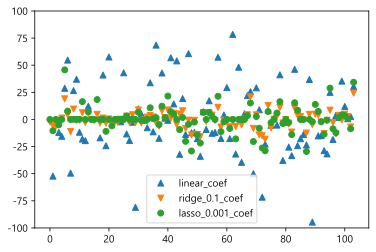

In [20]:
plt.plot(lr_reg.coef_, '^', label='linear_coef')
plt.plot(ridge.coef_, 'v', label='ridge_0.1_coef')
plt.plot(lasso.coef_, 'o', label='lasso_0.001_coef')
plt.ylim(-100, 100)
plt.legend()

In [21]:
cancer = load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [22]:
log_reg = LogisticRegression(C=10, max_iter=5000).fit(X_train, y_train)
log_reg.coef_.round(3), log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

(array([[ 1.425,  0.182, -0.11 ,  0.005, -0.933, -0.336, -1.345, -1.336,
         -1.869, -0.027, -0.076,  2.02 , -0.255, -0.114, -0.093,  0.94 ,
          0.609, -0.123, -0.035,  0.19 , -0.082, -0.457, -0.088, -0.011,
         -1.57 , -0.902, -4.025, -2.669, -3.1  , -0.171]]),
 0.9694835680751174,
 0.965034965034965)

In [23]:
# L1규제를 사용하기 위해서는 solver='liblinear' 지정 필요
log_reg = LogisticRegression(C=10, solver='liblinear', penalty='l1', max_iter=5000).fit(X_train, y_train)
log_reg.coef_.round(3), log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

(array([[ 8.5300e-01,  1.6000e-02,  1.0600e-01, -5.0000e-03,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  1.0850e+00, -4.5700e-01, -1.0300e-01,  0.0000e+00,
          0.0000e+00,  7.3880e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          3.1000e-01, -3.2400e-01,  1.5000e-02, -2.1000e-02,  0.0000e+00,
          0.0000e+00, -2.7000e+00, -3.7292e+01, -8.4190e+00,  0.0000e+00]]),
 0.9741784037558685,
 0.972027972027972)

In [24]:
X, y = make_blobs(random_state=42)

In [25]:
log_reg = LogisticRegression().fit(X, y)
log_reg.coef_, log_reg.intercept_

(array([[-0.38486163,  0.62874226],
        [ 0.74106233, -0.17664082],
        [-0.3562007 , -0.45210144]]),
 array([-1.63102014,  1.85764971, -0.22662957]))

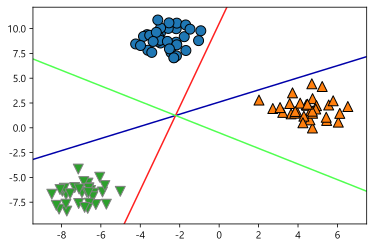

In [26]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(log_reg.coef_, log_reg.intercept_, mglearn.cm3.colors):
    # 구분 선에 대한 함수는 y = -(ax + b) / a'?
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.show()

In [27]:
np.logspace(-3, 1, 5)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [28]:
cancer = load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [29]:
sgd_clf = SGDClassifier(alpha=0.1, learning_rate='adaptive', eta0=0.1, random_state=42).fit(X_train, y_train)
sgd_clf.coef_.round(3), sgd_clf.score(X_train, y_train), sgd_clf.score(X_test, y_test)

(array([[ 2.0100e+00,  2.1620e+00,  1.1361e+01,  3.9700e+00,  1.6000e-02,
         -1.8000e-02, -5.0000e-02, -2.2000e-02,  2.6000e-02,  1.3000e-02,
         -1.2000e-02,  1.3600e-01, -2.3500e-01, -6.7170e+00,  1.0000e-03,
         -4.0000e-03, -6.0000e-03, -1.0000e-03,  2.0000e-03,  0.0000e+00,
          2.1250e+00,  2.6570e+00,  1.1094e+01, -5.9710e+00,  1.8000e-02,
         -6.7000e-02, -1.1200e-01, -3.0000e-02,  3.1000e-02,  1.0000e-02]]),
 0.9248826291079812,
 0.9090909090909091)

In [30]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [31]:
# eta0 파라미터는 항상 0보다 커야
sgd_reg = SGDRegressor(alpha=0.001, learning_rate='adaptive', eta0=0.1, penalty='l1', random_state=42).fit(X_train, y_train)
sgd_reg.coef_.round(3), sgd_reg.score(X_train, y_train), sgd_reg.score(X_test, y_test)

(array([ -1.26 ,  -2.497,   0.039,   0.   ,   3.061,  11.238,   4.198,
         -4.385,   5.851,   0.66 ,   0.986,   3.826,  -0.641,   1.221,
          0.   ,  -0.542,   0.387,  -2.049,  -0.957,  -1.668,   0.   ,
         -1.801,  -1.4  ,  -1.245,  -2.674,  -1.479,   4.054,  -3.016,
          0.   ,  -0.284,   5.671,  -3.159,   0.   ,   0.   ,   0.   ,
          0.07 ,  -2.526,  -3.747,   4.166,   1.987,   1.965,  -6.047,
          4.006,  -3.676,   2.746,   3.944,  -2.02 ,  -2.529,  -4.342,
          0.   ,  -8.19 ,  -5.195,   3.185,  -1.56 ,   2.497,   2.391,
          3.933,   2.198,  -2.394,  -0.9  ,  -3.777,  -1.664,  -0.111,
         -5.037,  -2.539,  -3.992,  -0.176,  -2.893,  22.387,  -2.571,
          1.952, -12.057, -12.517, -12.281,  12.432, -11.038,   0.299,
         -0.979,   3.395,  -0.044,  -2.761,  -4.184,  -5.059,   1.067,
          0.   ,  -0.78 ,   0.503,  -5.835,   0.717,   1.989,   3.069,
          2.279,   2.318, -11.425,   1.77 ,   1.504,  -1.613, -10.191,
      

In [33]:
# 나이브 베이즈 분류기 활용 연습(다른 책)

In [35]:
cancer = load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [37]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)
tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.9929577464788732, 0.9020979020979021)

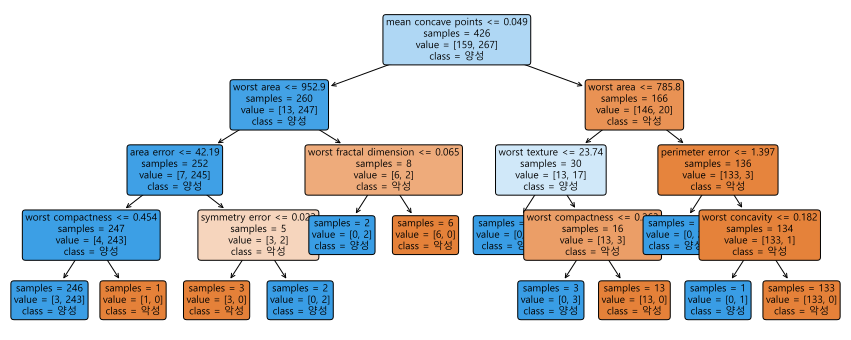

In [40]:
plt.figure(figsize=(15, 6))
plot_tree(tree_clf, class_names=['악성', '양성'], feature_names=cancer['feature_names'], impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

In [41]:
# 특성 중요도의 전체 합은 1
# 특성 중요도가 낮다고 하여 그 특성이 유용하지 않은 것은 아님 → 단지 트리가 선택하지 않았을 뿐
tree_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.72099985, 0.        , 0.        ,
       0.        , 0.        , 0.02007711, 0.01727487, 0.        ,
       0.        , 0.        , 0.        , 0.0124106 , 0.        ,
       0.        , 0.05097828, 0.        , 0.11722141, 0.        ,
       0.03525964, 0.01026499, 0.        , 0.        , 0.01551325])

In [44]:
def plot_feature_importances(dataset, model):
    # n_features_in_ 속성으로도 활용 가능
    n_features = dataset['data'].shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset['feature_names'])
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)

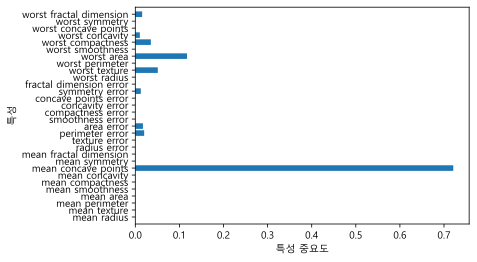

In [45]:
plot_feature_importances(cancer, tree_clf)

In [47]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'), index_col=0)
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


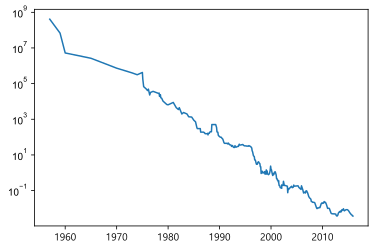

In [51]:
plt.semilogy(ram_prices['date'], ram_prices['price'])
plt.yticks(fontname='Arial')
plt.show()

In [61]:
data_train = ram_prices[ram_prices['date'] < 2000]
data_test = ram_prices[ram_prices['date'] >= 2000]
# X는 numpy.array(-1, 1) 형식 혹은 DataFrame 형식이어야
X_train = data_train[['date']]
y_train = data_train['price'].apply(lambda df: np.log(df))

In [64]:
tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
lr_reg = LinearRegression().fit(X_train, y_train)
# X는 numpy.array(-1, 1) 형식 혹은 DataFrame 형식이어야
X_all = ram_prices[['date']]
pred_tree = tree_reg.predict(X_all)
pred_lr = lr_reg.predict(X_all)
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


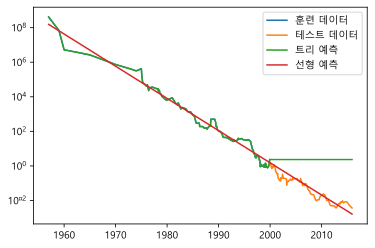

In [66]:
plt.semilogy(data_train['date'], data_train['price'], label='훈련 데이터')
plt.semilogy(data_test['date'], data_test['price'], label='테스트 데이터')
plt.semilogy(ram_prices['date'], price_tree, label='트리 예측')
plt.semilogy(ram_prices['date'], price_lr, label='선형 예측')
plt.legend()
plt.show()

In [68]:
cancer = load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [72]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1).fit(X_train, y_train)
rf_clf.score(X_train, y_train), rf_clf.score(X_test, y_test), rf_clf.feature_importances_

(1.0,
 0.972027972027972,
 array([0.02515433, 0.01563844, 0.05372655, 0.04861645, 0.00769078,
        0.00936994, 0.05539489, 0.10305394, 0.0065771 , 0.00282708,
        0.02921459, 0.00607814, 0.01342868, 0.03420174, 0.00360641,
        0.00432096, 0.00448775, 0.00657502, 0.00460597, 0.00627095,
        0.11657269, 0.01603133, 0.16027724, 0.0634688 , 0.01356448,
        0.01164113, 0.03923725, 0.11711756, 0.01164259, 0.00960721]))

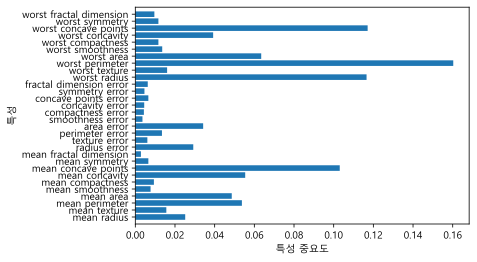

In [73]:
plot_feature_importances(cancer, rf_clf)

In [78]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train)
gb_clf.score(X_train, y_train), gb_clf.score(X_test, y_test), gb_clf.feature_importances_

(0.9906103286384976,
 0.972027972027972,
 array([0.00000000e+00, 9.07529959e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.32035766e-03, 2.65686907e-01,
        3.49588341e-04, 0.00000000e+00, 0.00000000e+00, 3.00083378e-04,
        0.00000000e+00, 1.45838255e-02, 1.05083243e-03, 0.00000000e+00,
        4.75469106e-03, 0.00000000e+00, 9.56890421e-04, 0.00000000e+00,
        9.23939383e-03, 1.61819935e-02, 3.22495788e-01, 9.24249926e-02,
        6.44041105e-03, 0.00000000e+00, 6.85101108e-03, 2.31450675e-01,
        6.41500790e-03, 3.42225071e-03]))

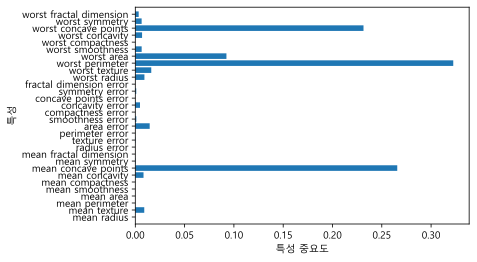

In [79]:
plot_feature_importances(cancer, gb_clf)

In [83]:
bag_clf = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=0).fit(X_train, y_train)
bag_clf.score(X_train, y_train), bag_clf.score(X_test, y_test), bag_clf.oob_score_

(0.9553990610328639, 0.951048951048951, 0.9366197183098591)

In [84]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
ada_clf.score(X_train, y_train), ada_clf.score(X_test, y_test), ada_clf.feature_importances_

(1.0,
 0.986013986013986,
 array([0.  , 0.08, 0.  , 0.  , 0.07, 0.06, 0.03, 0.05, 0.01, 0.01, 0.  ,
        0.03, 0.01, 0.11, 0.01, 0.05, 0.01, 0.02, 0.04, 0.04, 0.01, 0.08,
        0.04, 0.04, 0.02, 0.01, 0.05, 0.04, 0.06, 0.02]))

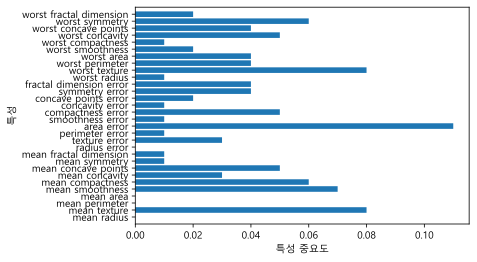

In [85]:
plot_feature_importances(cancer, ada_clf)